In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


LEN = 200

# Simulate random measured data of a constant value
RAN = np.array([i for i in np.linspace( 20, 25, num = 256)])

# Simulate random variances, 1-2.58 because small variances cause underflow issues
COV = np.array([i for i in np.linspace(1, 2.58, 256)])

TIME = np.arange(0, 100, .5)

def setData():
    x = np.array([])
    for i in range(LEN):
        x = np.append(x, random.choice(RAN))
    return x

def setCovariance():
    x = np.array([])
    for i in range(LEN):
        x = np.append(x, random.choice(COV))
    return x



x = setData()
p = setCovariance()

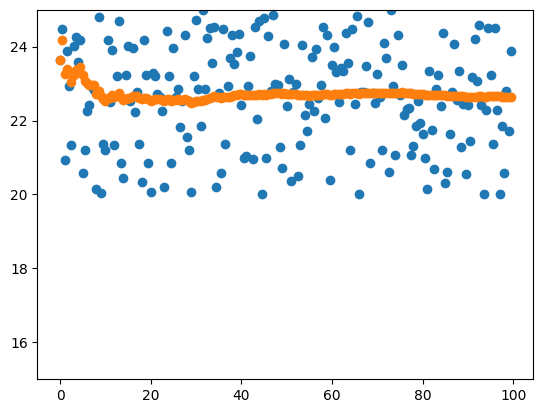

In [2]:
# Time loop - each iteration represents a time stamp with data measured and collected
e_est = p[0]
est_t = x[0]

e = np.array([est_t])

for i in range (1, LEN, 1):
    # Calculate Kalman gain e_est / (e_est + e_mear)
    kg = e_est / (e_est + p[i])

    # Get new estimate: est_t = est_t-1 + KG[mea - est_t-1]
    est_t = est_t + (kg * (x[i] - est_t))

    # Calculate new error with est_t: E_est_t = [1-KG](e_est_t-1)
    e_est = (1-kg) * (e_est) 

    # Store
    e = np.append(e, est_t)

plt.scatter(TIME,x)
plt.scatter(TIME,e)
plt.ylim((15,25))
plt.show()